In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
import logging
import numpy as np

import xarray as xr
import xarray.ufuncs as xu
import xrft
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

from cross_defPlot import *
from cross_compute import *

from dask.distributed import Client, LocalCluster
#
# Initialisation d'un cluster de 32 coeurs
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, silence_logs='error', protocol = 'tcp://',
                      host = '137.129.155.67')
client = Client(cluster)
client

/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46919 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:46919/status,
Dashboard: http://137.129.155.67:46919/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://137.129.155.67:45975,Workers: 1
Dashboard: http://137.129.155.67:46919/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://137.129.155.67:44325,Total threads: 4
Dashboard: http://137.129.155.67:43465/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
### Parameter for the analysis
year = 2009
latitude = 10.5
longitude = 179

wave = ['TCWV_Kelvin','OLR_Kelvin']
coeff = 2

day1 = '2009-07-01'
day2 = '2009-10-01'

ds_VAR, ds_FILTER = openDATA(year)

In [3]:
### Compute standard deviation
ds_VAR_mean = ds_VAR.mean().compute()
ds_std_mean = ds_VAR_mean**(0.5)
ds_std = ds_VAR**(0.5)
for w in wave:
    ds_FILTER = addNegative(ds_FILTER, ds_std_mean, w)
    
ds_FILTER = ds_FILTER.sel(time = slice(day1,day2), lat = slice(5,15), lon = slice(115,125))
ds_FILTER

<xarray.Dataset>
Dimensions:            (lat: 10, time: 744, lon: 10)
Coordinates:
  * lat                (lat) float64 5.5 6.5 7.5 8.5 9.5 ... 11.5 12.5 13.5 14.5
  * time               (time) datetime64[ns] 2009-07-01 ... 2009-10-01T21:00:00
  * lon                (lon) float32 115.5 116.5 117.5 ... 122.5 123.5 124.5
Data variables: (12/22)
    TCWV_Kelvin        (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Rossby        (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_MJO           (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_MRG           (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_EIG           (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_WIG           (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    ...                 ...
    tcwv_ano           (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    OLR_ano            (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    STD_TCWV_Kelvin    (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    STD_TCWV_Kelvin_N  (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    STD_OLR_Kelvin     (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    STD_OLR_Kelvin_N   (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>

# Vision en 1D en différents points du globe
On selectionne des données en plein ocean et sur le continent dans la bande équatoriale

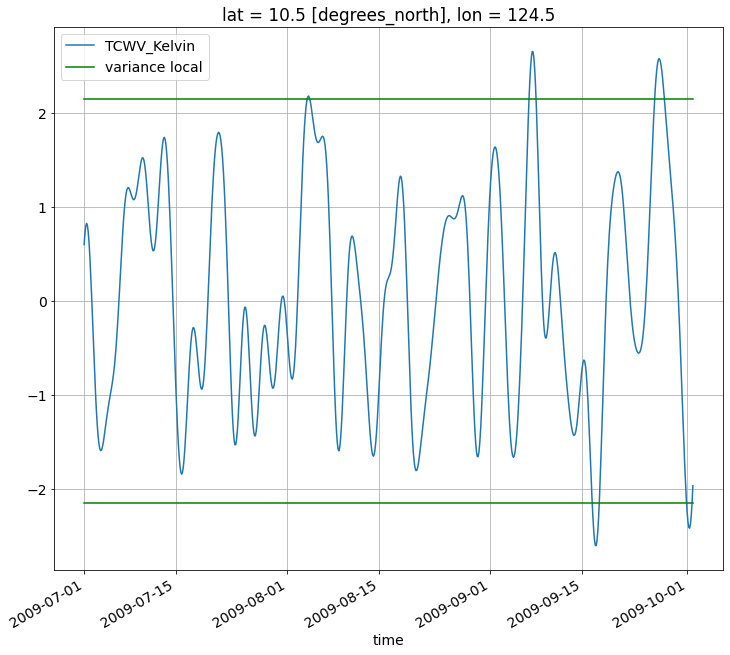

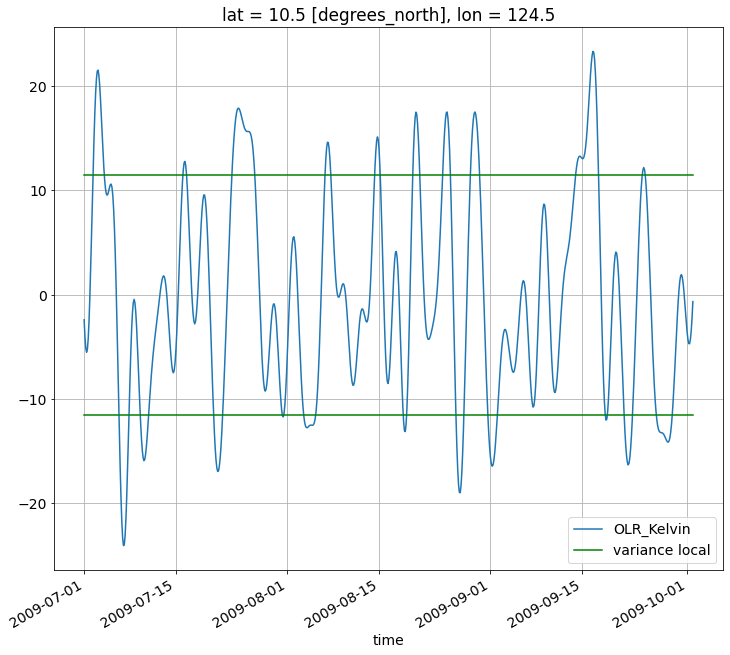

In [4]:
for w in wave:
    plotline1D(ds_FILTER, latitude, longitude, w)


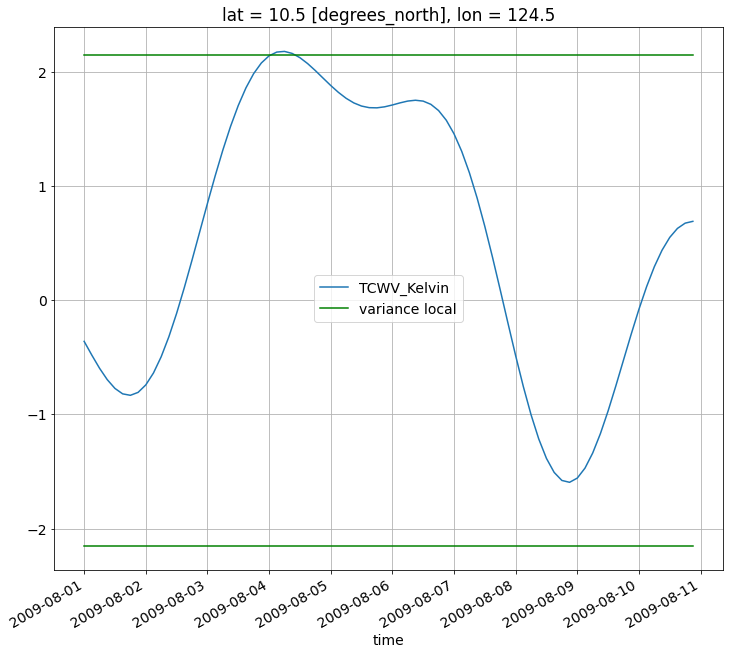

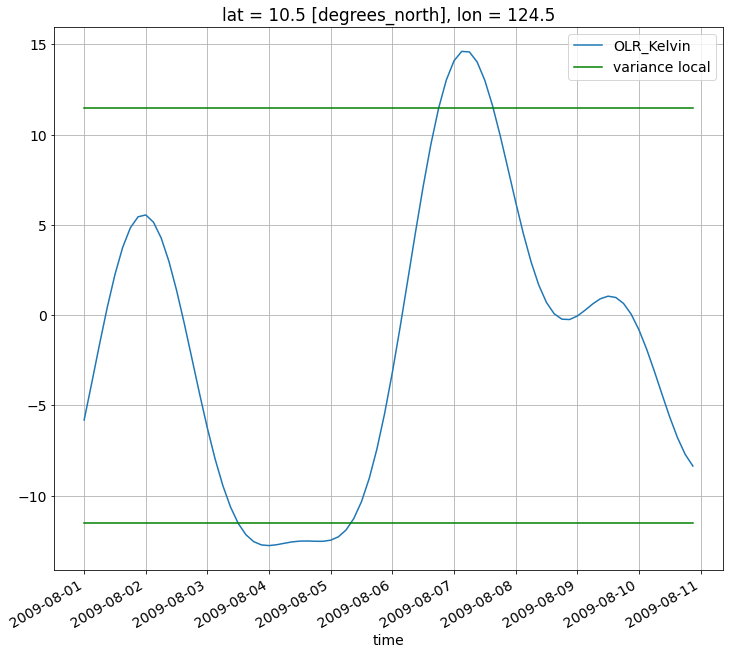

In [5]:
_ds_FILTER = ds_FILTER.sel(time = slice('2009-08-01','2009-08-10'))
for w in wave:
    plotline1D(_ds_FILTER, latitude, longitude, w)


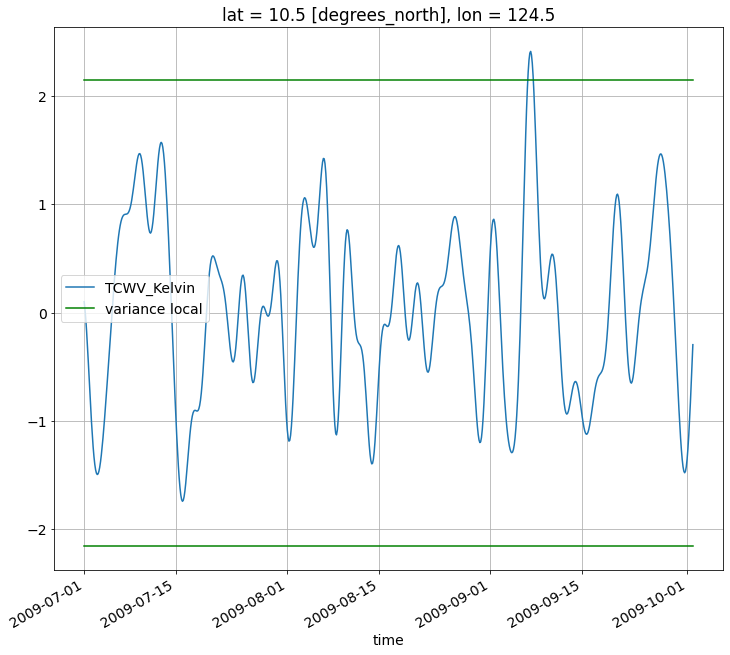

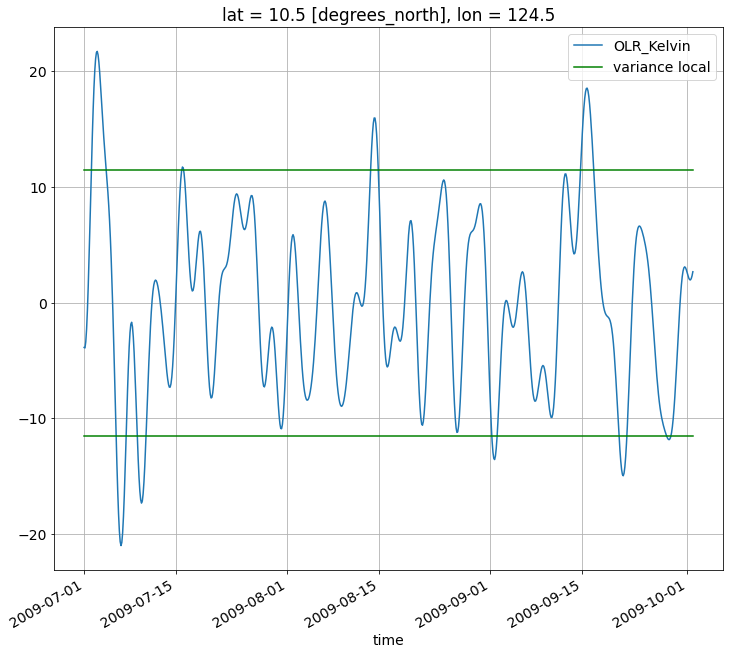

In [6]:
for w in wave:
    plotline1D_mean(ds_FILTER, latitude, longitude, w)

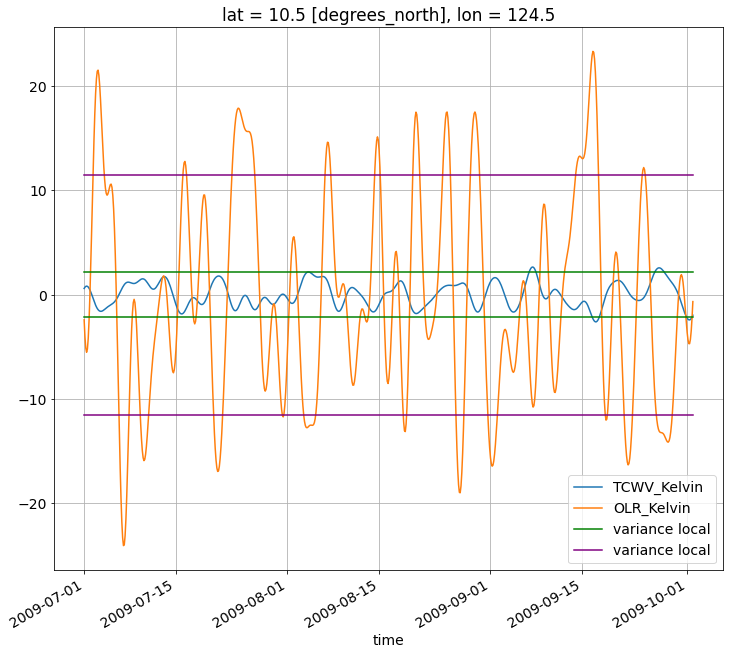

In [7]:
wave1 = wave[0]
wave2 = wave[1]
plotline1D_2V(ds_FILTER, latitude, longitude, wave1, wave2)    

# Garder uniquement les valeurs supérieur-inférieur à une valeur cible
Dans un premier temps on garde par rapport à l'anomalie filtré puis par rapport à l'anomalie

### Par rapport à l'anomalie filtré

In [8]:
wave1 = wave[0]
wave2 = wave[1]
ds_FILTER = keepData(ds_FILTER, coeff*0., wave1, wave2)
ds_FILTER

<xarray.Dataset>
Dimensions:                                (lat: 10, time: 744, lon: 10)
Coordinates:
  * lat                                    (lat) float64 5.5 6.5 ... 13.5 14.5
  * time                                   (time) datetime64[ns] 2009-07-01 ....
  * lon                                    (lon) float32 115.5 116.5 ... 124.5
Data variables: (12/26)
    TCWV_Kelvin                            (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Rossby                            (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_MJO                               (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_MRG                               (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_EIG                               (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_WIG                               (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    ...                                     ...
    STD_OLR_Kelvin                         (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    STD_OLR_Kelvin_N                       (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Kelvin_sum_TS                     (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Kelvin_below_TS                   (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    TCWV_Kelvin_above_TS                   (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    OLR_Kelvin_FILTERED_by_TCWV_Kelvin_TS  (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>

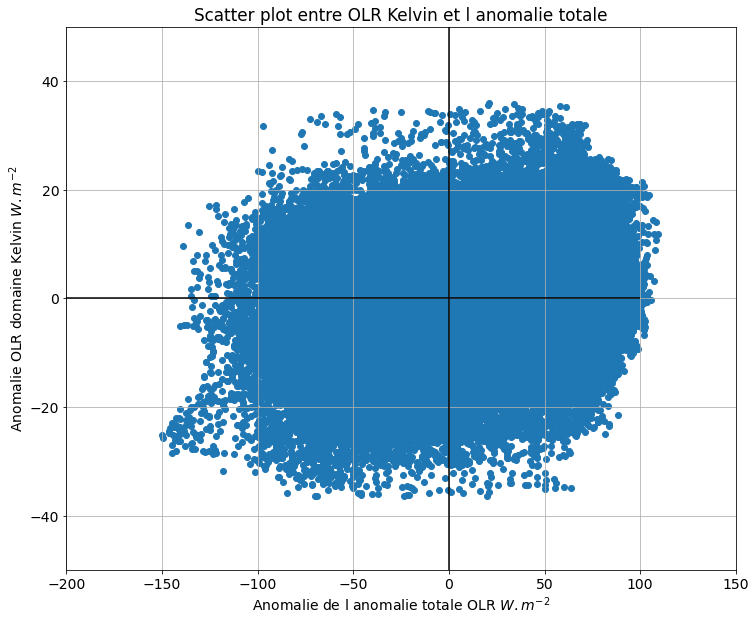

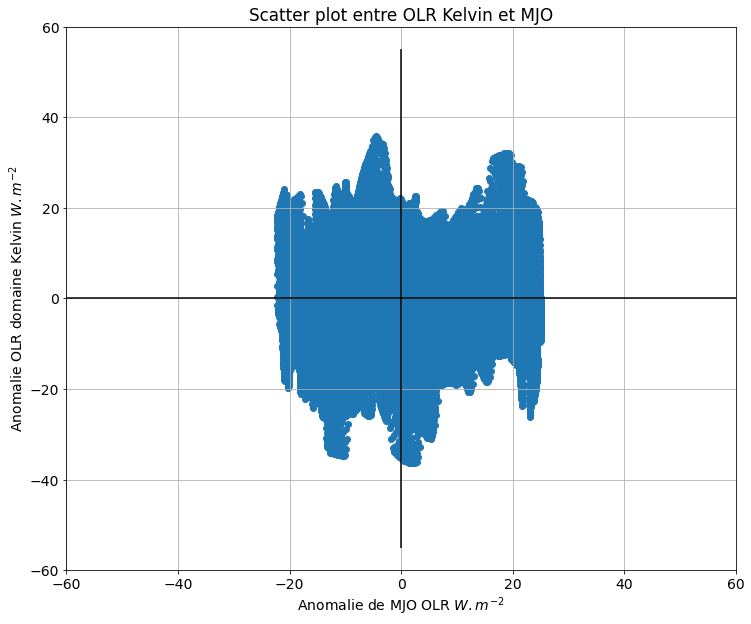

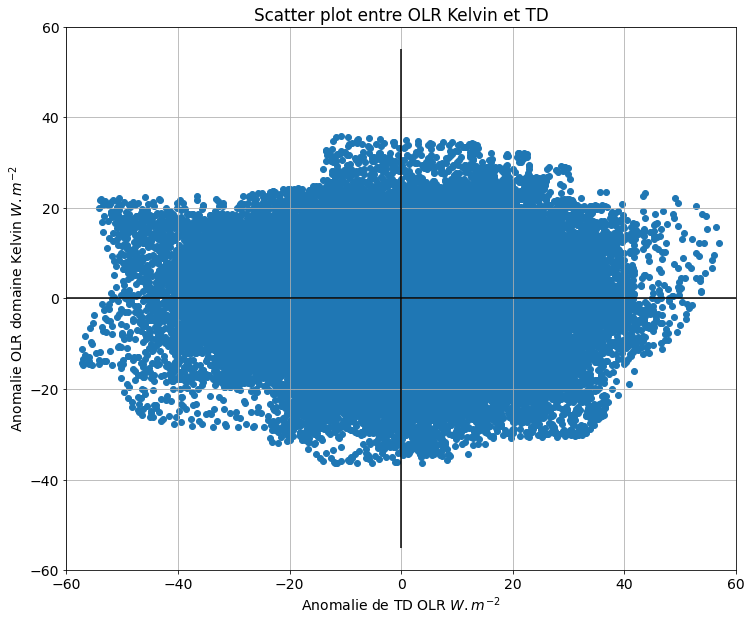

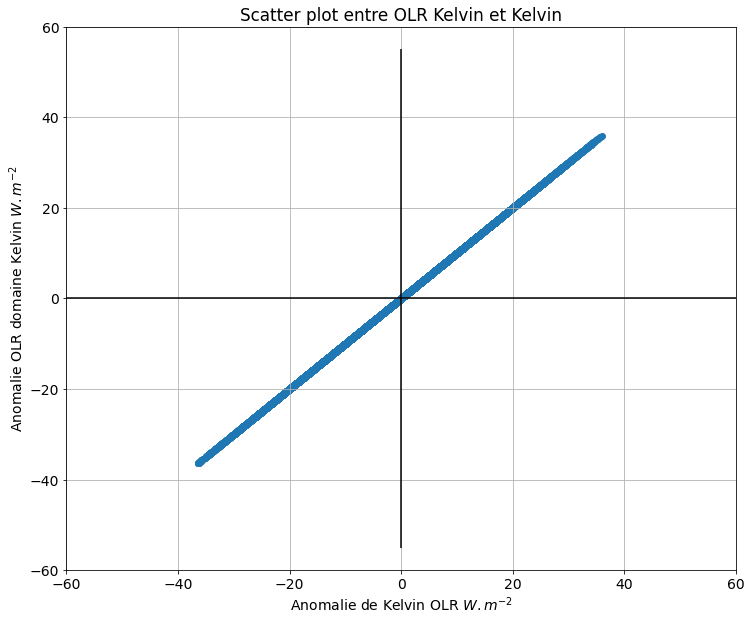

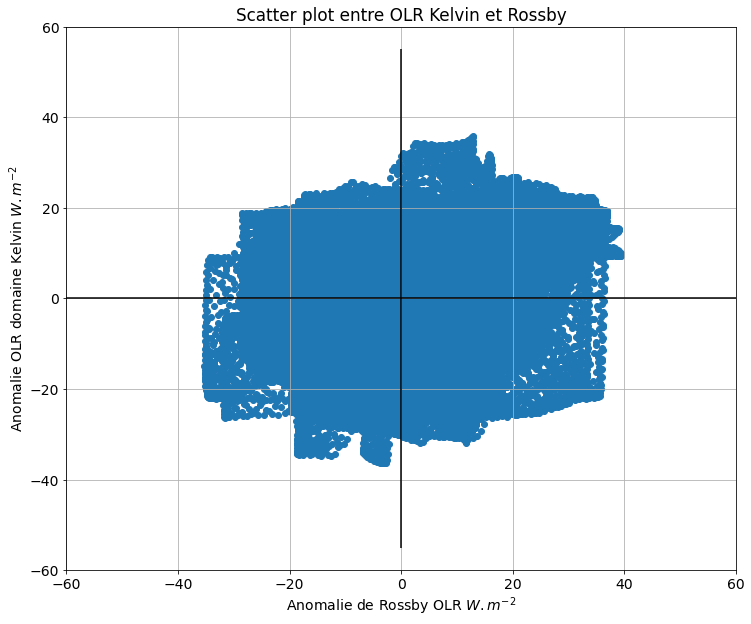

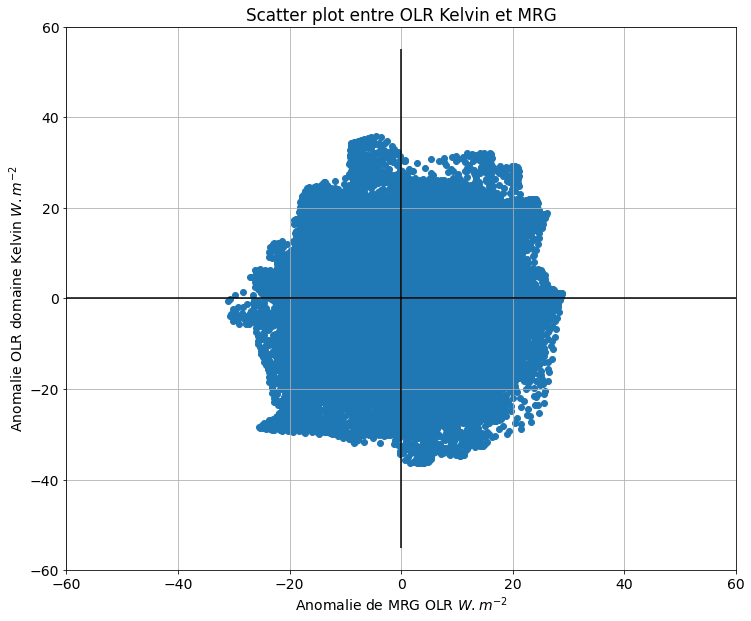

In [11]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER.plot.scatter(x = 'OLR_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale OLR $W.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et l anomalie totale')
plt.xlim(-200,150)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER.plot.scatter(x = 'OLR_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' OLR $W.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et '+ v)
    plt.xlim(-60,60)
    plt.ylim(-60,60)
    plt.grid()
    plt.show()

In [12]:
ds_FILTER_mean = ds_FILTER.mean(dim = ['lat','lon'])

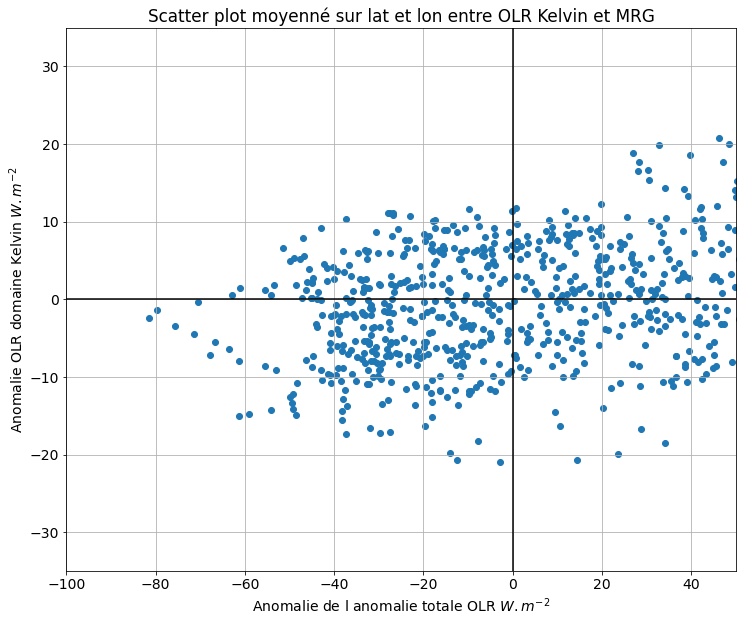

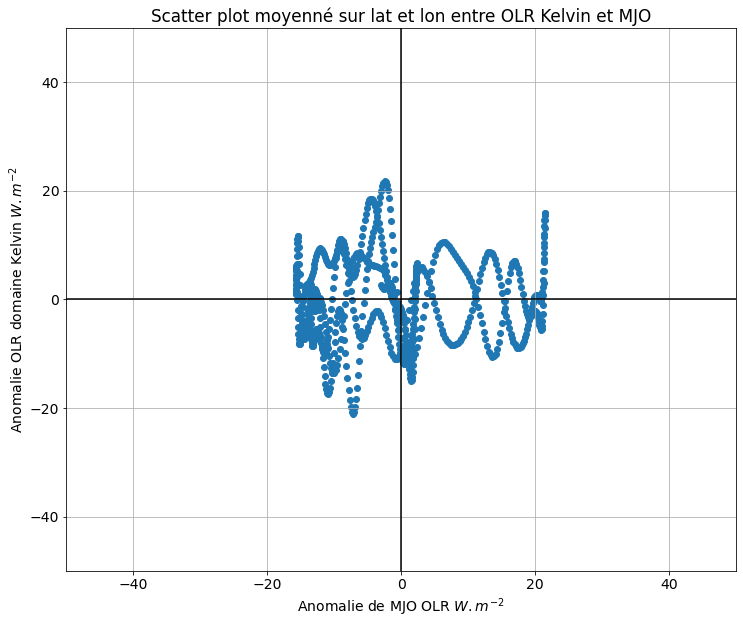

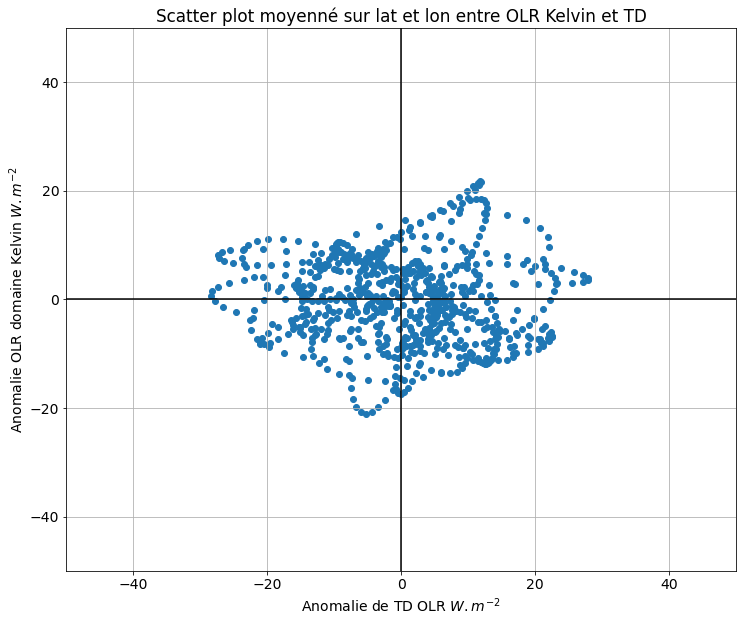

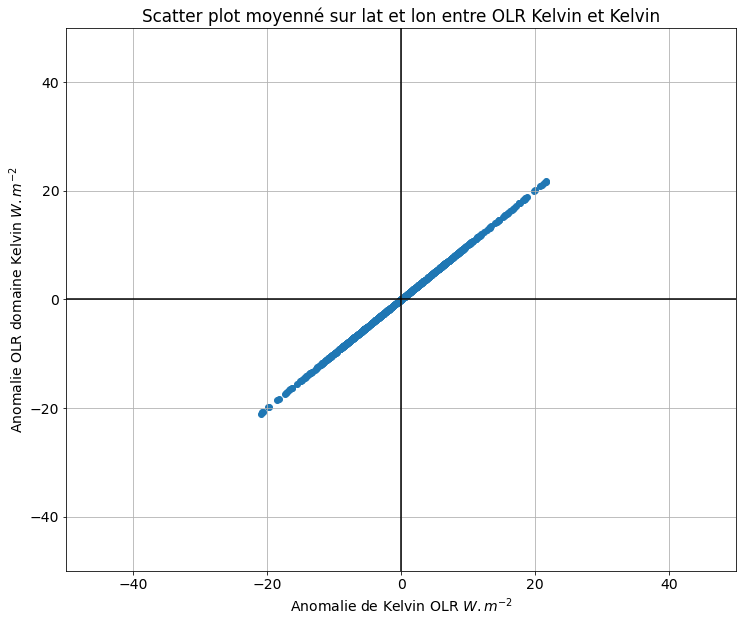

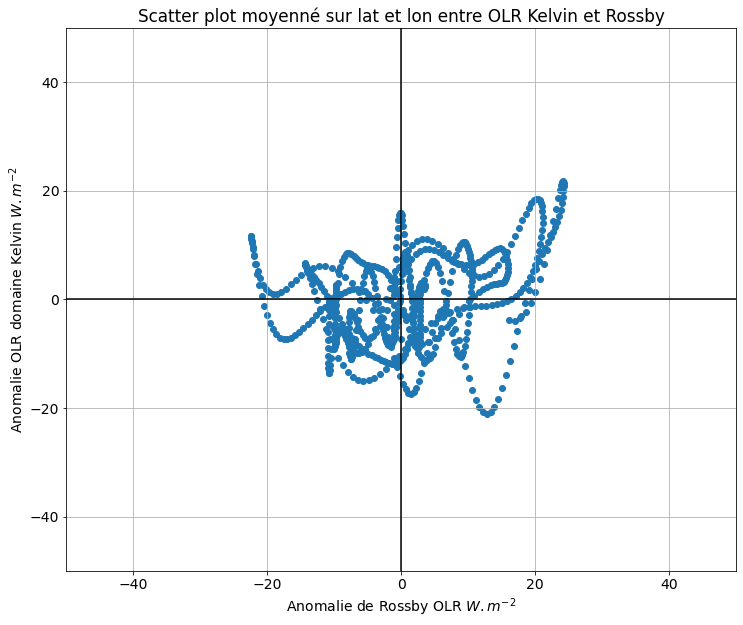

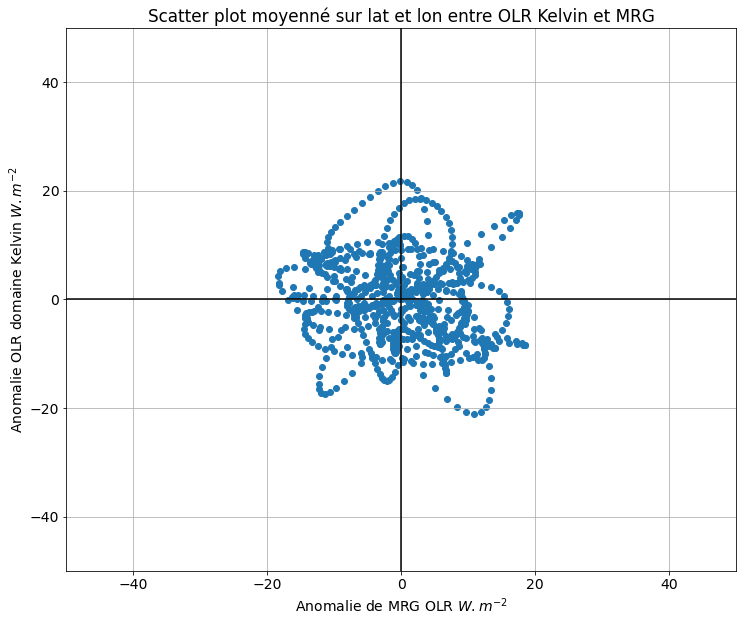

In [13]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER_mean.plot.scatter(x = 'OLR_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale OLR $W.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot moyenné sur lat et lon entre OLR Kelvin et '+ v)
plt.xlim(-100,50)
plt.ylim(-35,35)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER_mean.plot.scatter(x = 'OLR_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' OLR $W.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot moyenné sur lat et lon entre OLR Kelvin et '+ v)
    plt.xlim(-50,50)
    plt.ylim(-50,50)
    plt.grid()
    plt.show()

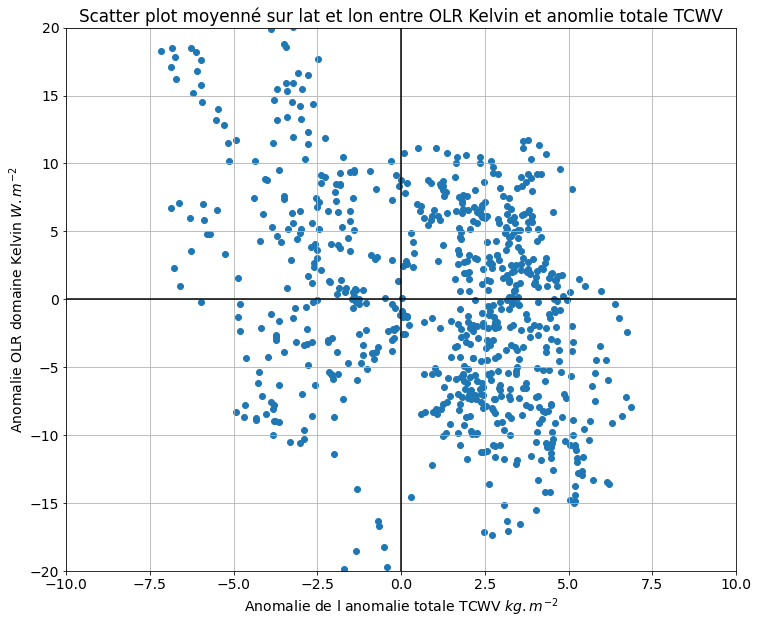

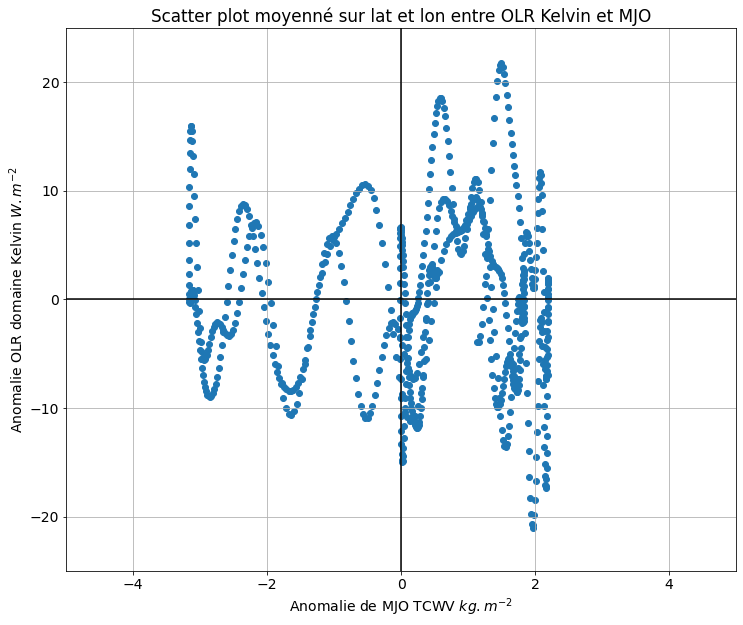

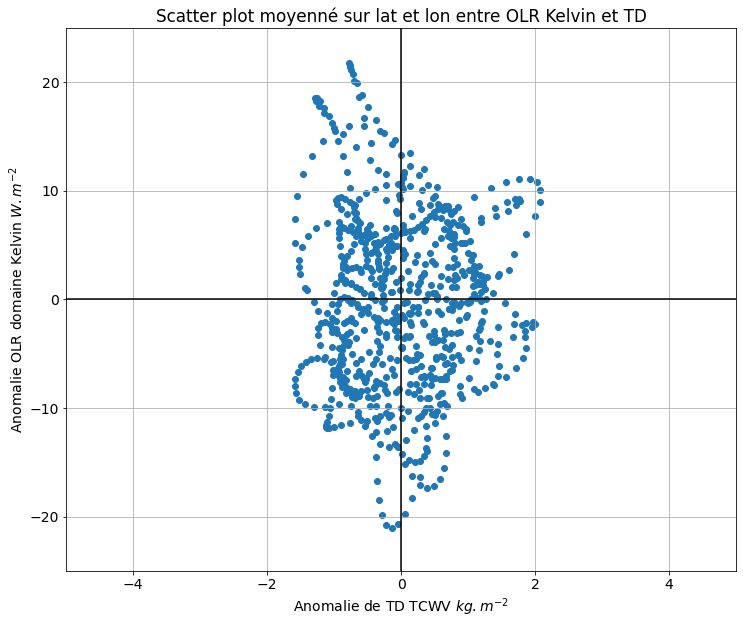

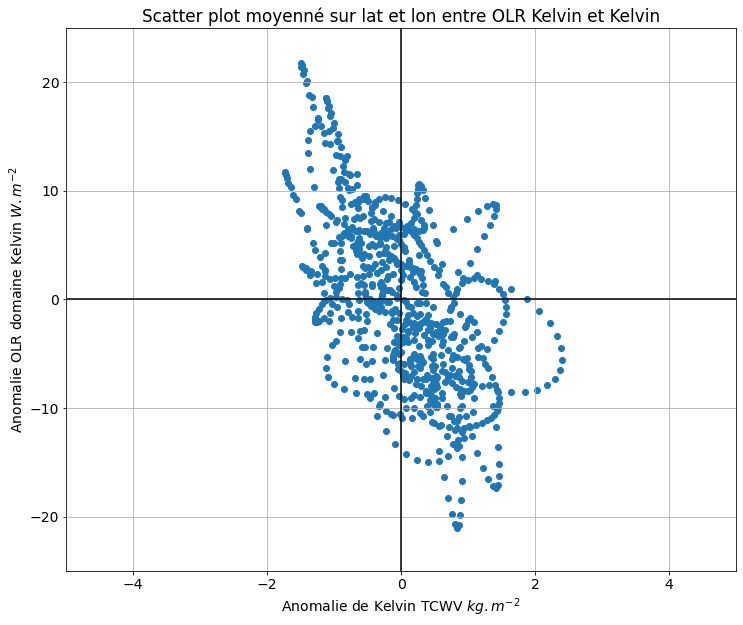

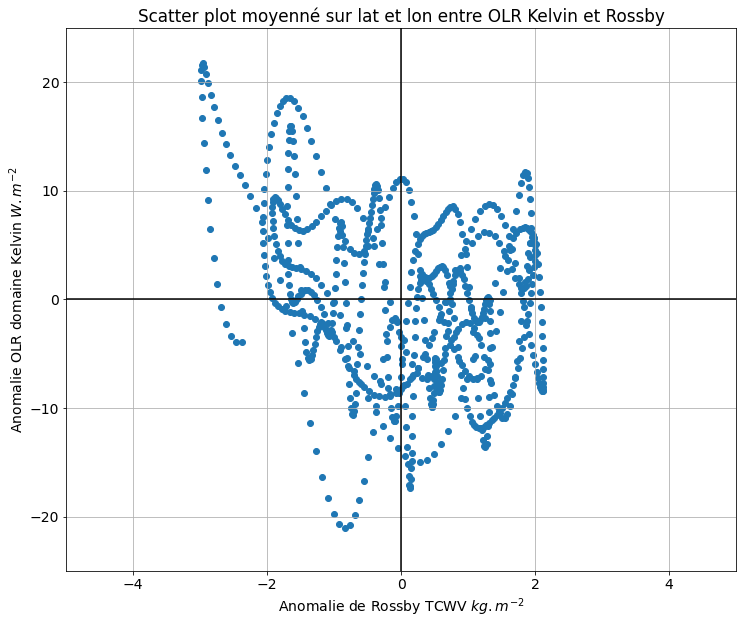

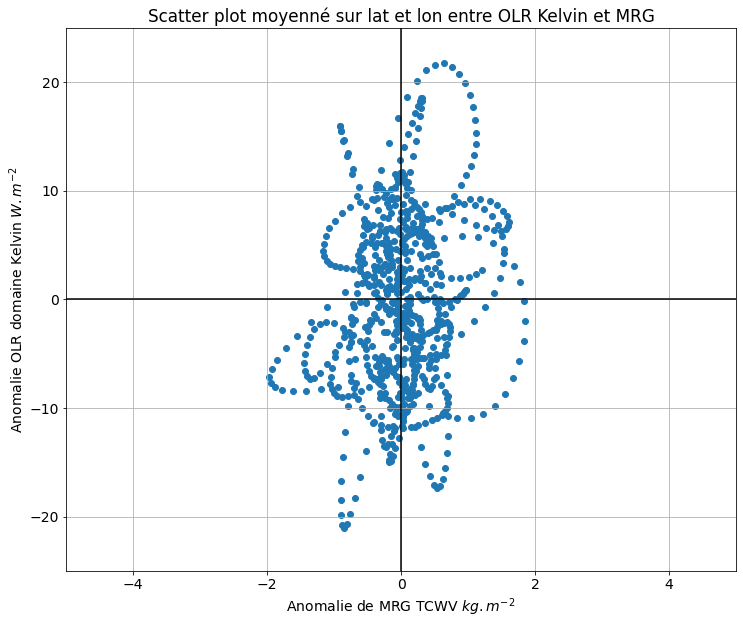

In [14]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER_mean.plot.scatter(x = 'tcwv_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale TCWV $kg.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot moyenné sur lat et lon entre OLR Kelvin et anomlie totale TCWV')
plt.xlim(-10,10)
plt.ylim(-20,20)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER_mean.plot.scatter(x = 'TCWV_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' TCWV $kg.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot moyenné sur lat et lon entre OLR Kelvin et '+ v)
    plt.xlim(-5,5)
    plt.ylim(-25,25)
    plt.grid()
    plt.show()

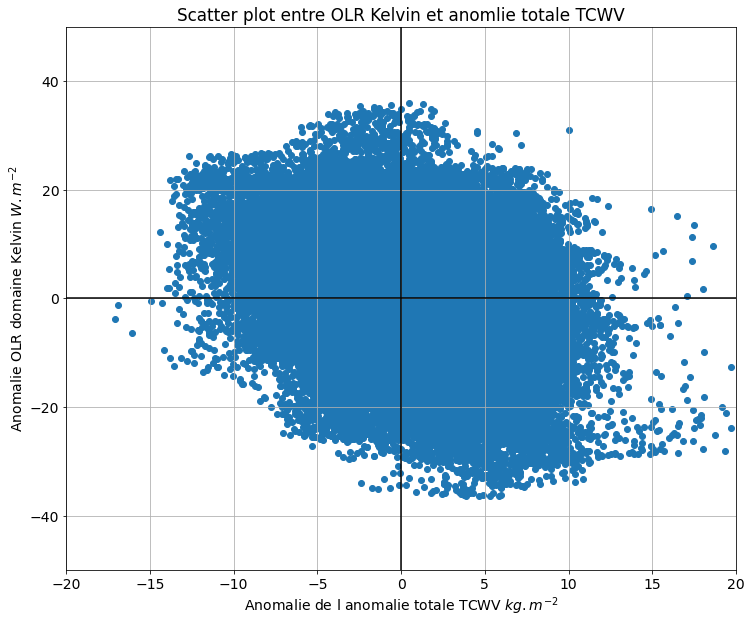

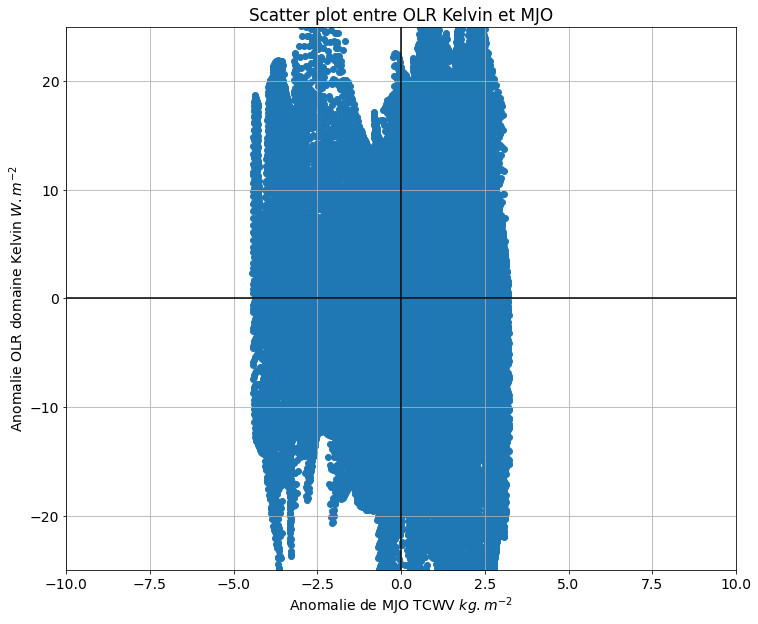

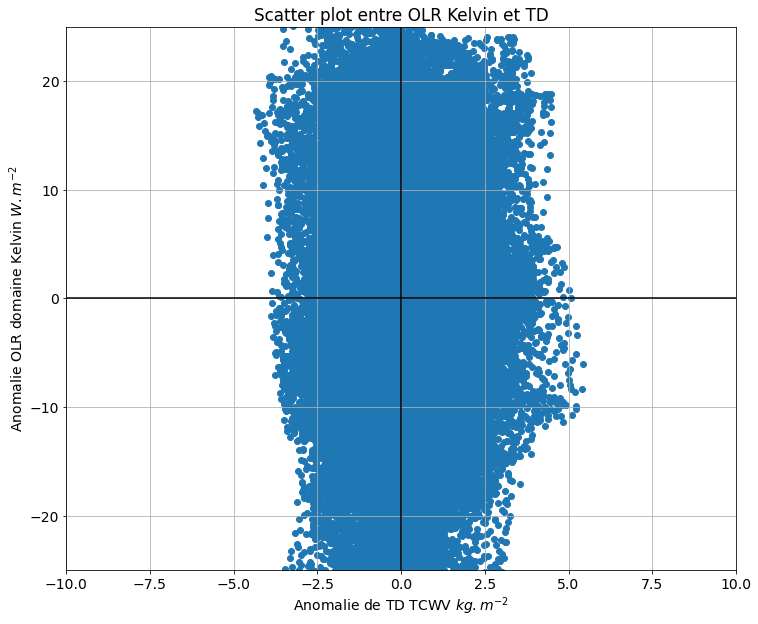

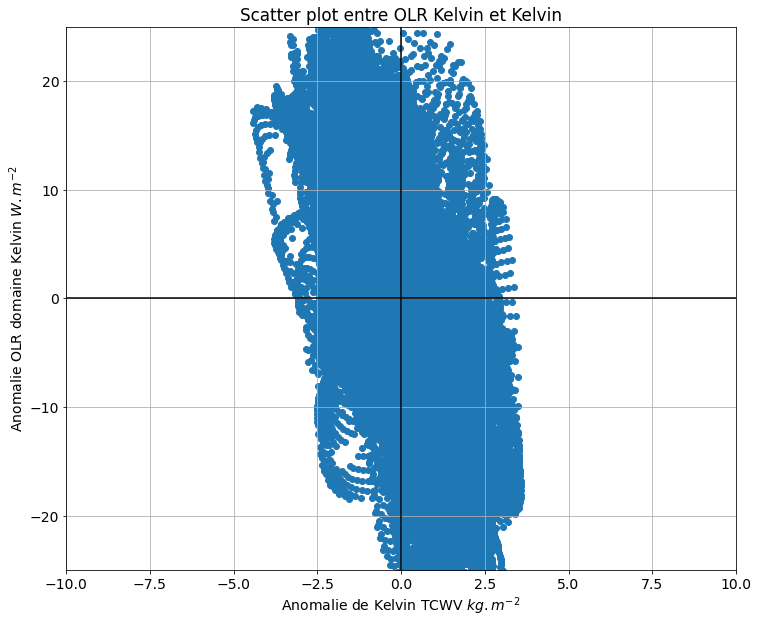

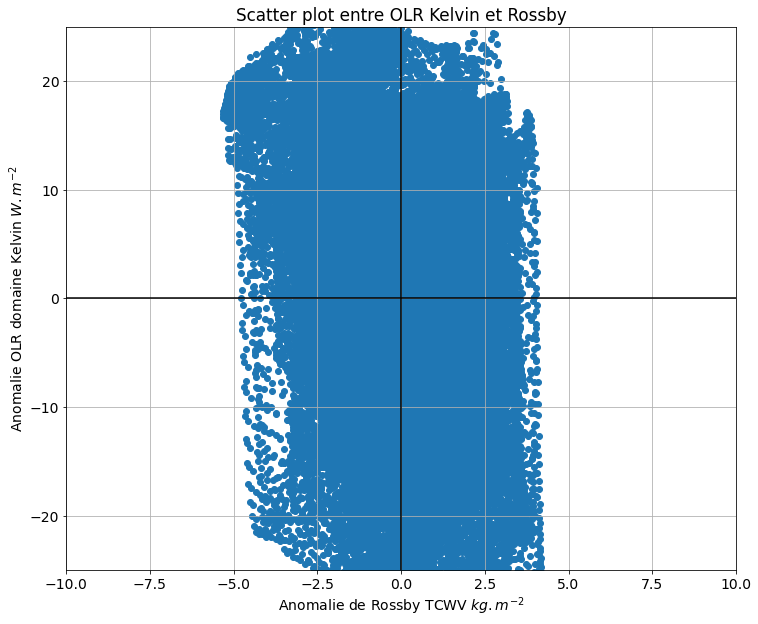

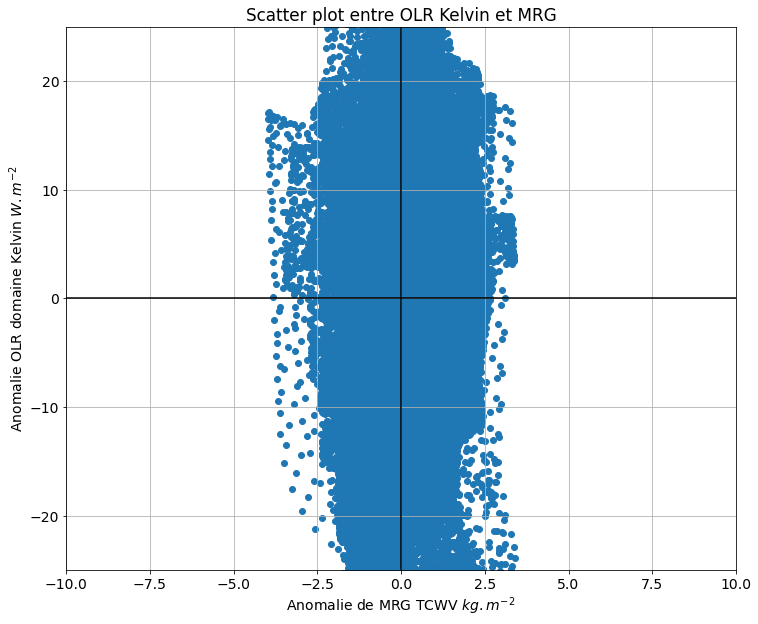

In [15]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER.plot.scatter(x = 'tcwv_ano', y = 'OLR_Kelvin')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale TCWV $kg.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et anomlie totale TCWV')
plt.xlim(-20,20)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER.plot.scatter(x = 'TCWV_' + v, y = 'OLR_Kelvin')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' TCWV $kg.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et '+ v)
    plt.xlim(-10,10)
    plt.ylim(-30,30)
    plt.grid()
    plt.show()

### Par rapport à l'anomalie

In [ ]:
_da_nb_jour, _da_nb_jour_N = computeDayBelowAbove(ds_FILTER,ds_std,coeff, wave)

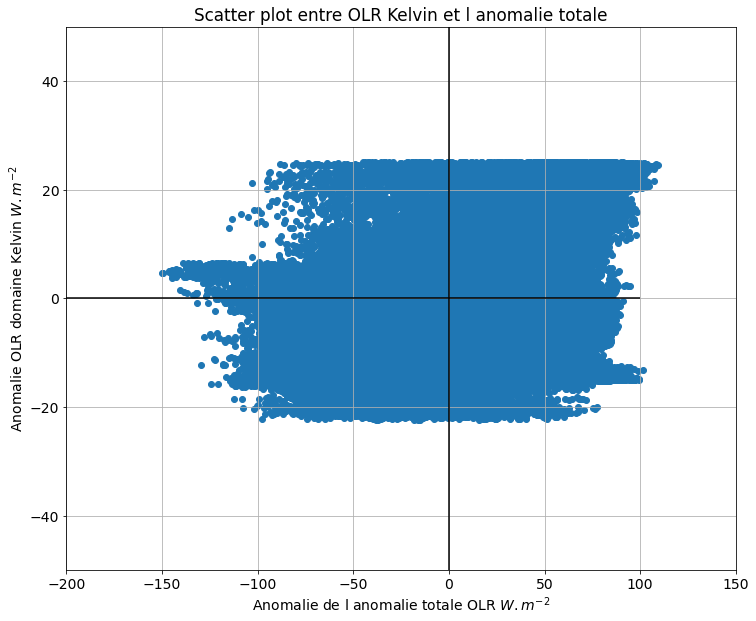

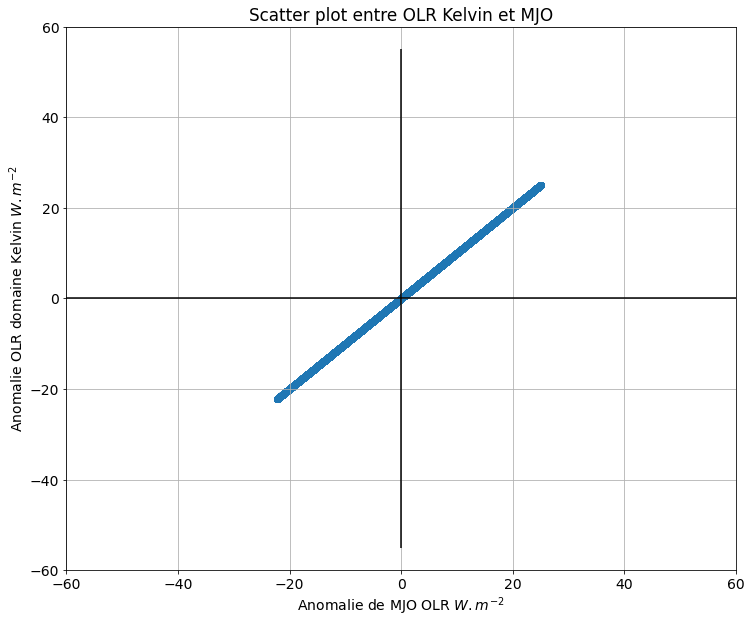

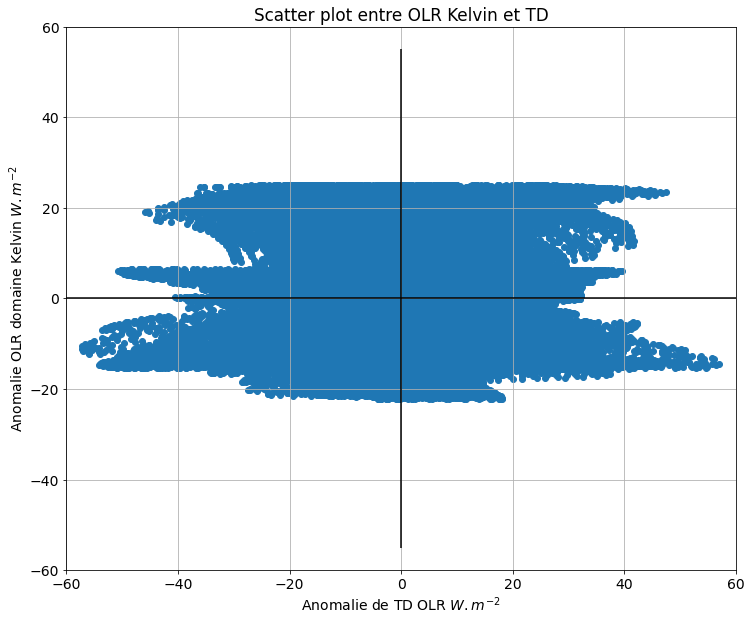

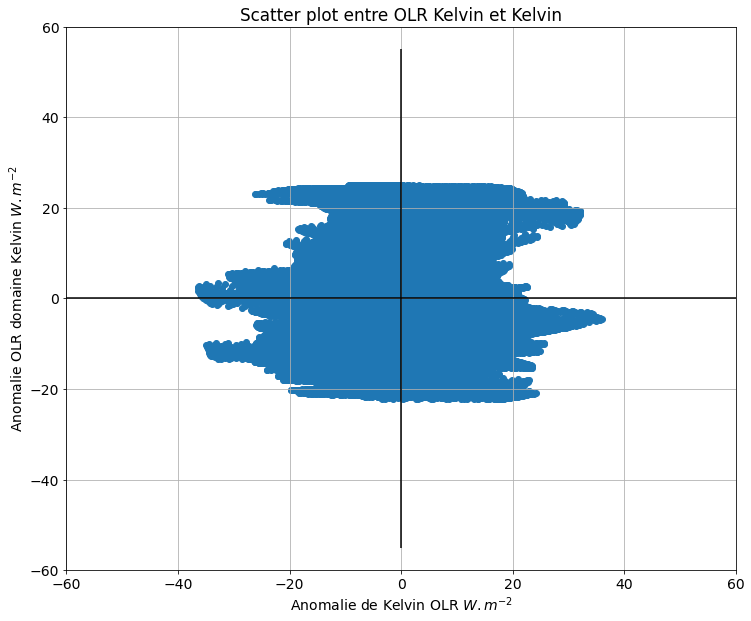

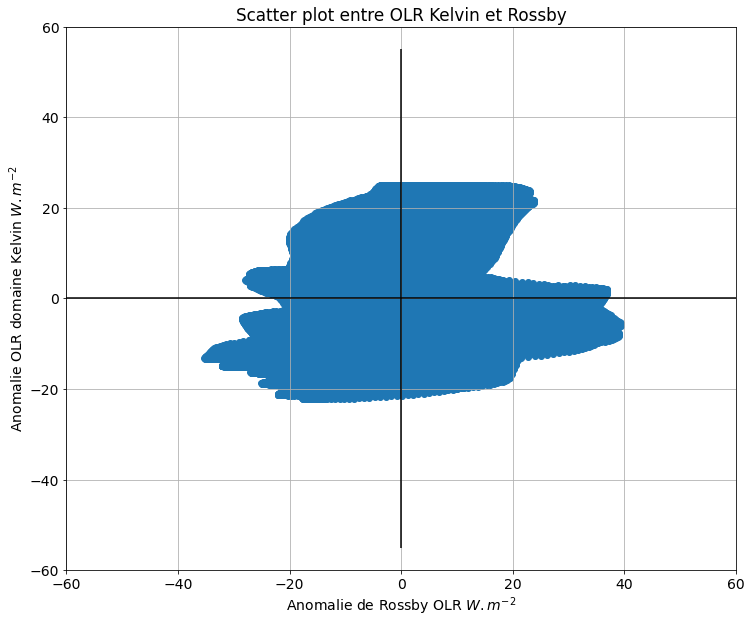

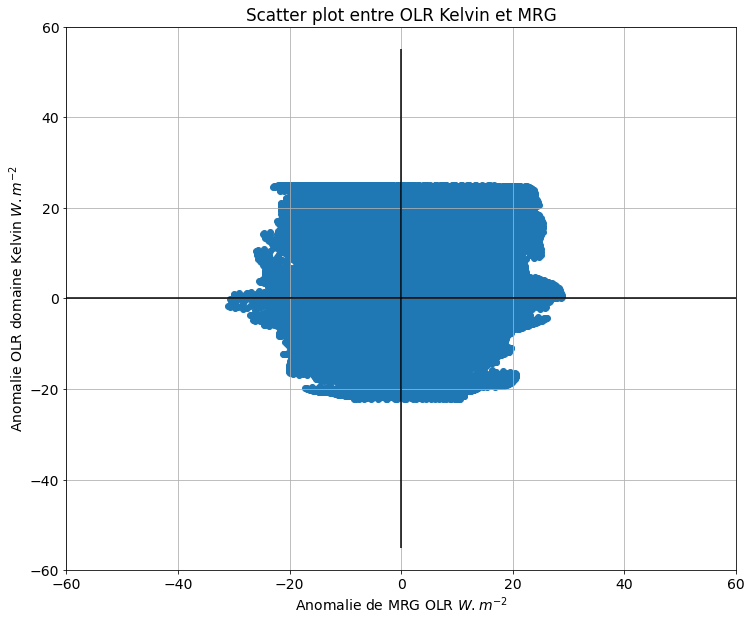

In [16]:
variable = ['MJO','TD','Kelvin','Rossby','MRG']
plt.rc("figure", figsize=(12,10))
ds_FILTER.plot.scatter(x = 'OLR_ano', y = 'OLR_MJO')
plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
plt.xlabel('Anomalie de l anomalie totale OLR $W.m^{-2}$')
plt.hlines(0, -250, 100, colors = 'black')
plt.vlines(0, -55, 55, colors = 'black')
plt.title('Scatter plot entre OLR Kelvin et l anomalie totale')
plt.xlim(-200,150)
plt.ylim(-50,50)
plt.grid()
plt.show()
    
for v in variable :
    plt.rc("figure", figsize=(12,10))
    ds_FILTER.plot.scatter(x = 'OLR_' + v, y = 'OLR_MJO')
    plt.ylabel('Anomalie OLR domaine Kelvin $W.m^{-2}$')
    plt.xlabel('Anomalie de ' + v + ' OLR $W.m^{-2}$')
    plt.hlines(0, -250, 100, colors = 'black')
    plt.vlines(0, -55, 55, colors = 'black')
    plt.title('Scatter plot entre OLR Kelvin et '+ v)
    plt.xlim(-60,60)
    plt.ylim(-60,60)
    plt.grid()
    plt.show()